In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2024-01-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2024_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-01-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",9675,사상구,11925,사상구,2250,23.26%,"10,800"
1,2024-01-11,간장,오복왕표 0.9ℓ 1병,7980,사상구,7980,사상구,0,0.0%,"7,980"
2,2024-01-11,갈치,60cm정도 500g 1마리(냉동),13915,사상구,15980,사상구,2065,14.84%,"14,948"
3,2024-01-11,고등어,30㎝정도 500g 1마리,5200,사상구,6545,사상구,1345,25.87%,"5,873"
4,2024-01-11,달걀,오경슈퍼란60g정도 10개,3990,사상구,3990,사상구,0,0.0%,"3,990"
5,2024-01-11,닭고기,육계 1.0㎏,10600,사상구,14990,사상구,4390,41.42%,"12,795"
6,2024-01-11,대파,1.0㎏,4990,사상구,4990,사상구,0,0.0%,"4,990"
7,2024-01-11,돼지고기,삼겹살 500g,11600,사상구,13860,사상구,2260,19.48%,"12,730"
8,2024-01-11,두부,500g 판두부(국산포장두부 420g) 1모,6056,사상구,6067,사상구,11,0.18%,"6,062"
9,2024-01-11,라면,신라면 120g 1봉지,780,사상구,780,사상구,0,0.0%,780


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2024-04-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2024_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-04-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",9675,사상구,10425,사상구,750,7.75%,"10,050"
1,2024-04-11,간장,오복왕표 0.9ℓ 1병,7980,사상구,7980,사상구,0,0.0%,"7,980"
2,2024-04-11,갈치,60cm정도 500g 1마리(냉동),12675,사상구,15980,사상구,3305,26.07%,"14,328"
3,2024-04-11,고등어,30㎝정도 500g 1마리,5700,사상구,6240,사상구,540,9.47%,"5,970"
4,2024-04-11,달걀,오경슈퍼란60g정도 10개,3990,사상구,3990,사상구,0,0.0%,"3,990"
5,2024-04-11,닭고기,육계 1.0㎏,8800,사상구,14990,사상구,6190,70.34%,"11,895"
6,2024-04-11,대파,1.0㎏,2741,사상구,3500,사상구,759,27.69%,"3,121"
7,2024-04-11,돼지고기,삼겹살 500g,10900,사상구,10950,사상구,50,0.46%,"10,925"
8,2024-04-11,두부,500g 판두부(국산포장두부 420g) 1모,6056,사상구,6067,사상구,11,0.18%,"6,062"
9,2024-04-11,라면,신라면 120g 1봉지,780,사상구,780,사상구,0,0.0%,780


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2024-07-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2024_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-07-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",17250,사상구,17250,사상구,0,0.0%,"17,250"
1,2024-07-11,간장,오복왕표 0.9ℓ 1병,7980,사상구,7980,사상구,0,0.0%,"7,980"
2,2024-07-11,갈치,60cm정도 500g 1마리(냉동),12490,사상구,14900,사상구,2410,19.3%,"13,695"
3,2024-07-11,고등어,30㎝정도 500g 1마리,4500,사상구,5120,사상구,620,13.78%,"4,810"
4,2024-07-11,달걀,오경슈퍼란60g정도 10개,3990,사상구,3990,사상구,0,0.0%,"3,990"
5,2024-07-11,닭고기,육계 1.0㎏,8990,사상구,16800,사상구,7810,86.87%,"12,895"
6,2024-07-11,대파,1.0㎏,2391,사상구,2880,사상구,489,20.45%,"2,636"
7,2024-07-11,돼지고기,삼겹살 500g,12450,사상구,14900,사상구,2450,19.68%,"13,675"
8,2024-07-11,두부,500g 판두부(국산포장두부 420g) 1모,6056,사상구,6067,사상구,11,0.18%,"6,062"
9,2024-07-11,라면,신라면 120g 1봉지,780,사상구,780,사상구,0,0.0%,780


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2024-10-17"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2024_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-10-17,가루비누,"세탁용세제(LG테크),가루형,3.0kg",10425,사상구,14850,사상구,4425,42.45%,"12,638"
1,2024-10-17,간장,오복왕표 0.9ℓ 1병,8480,사상구,8480,사상구,0,0.0%,"8,480"
2,2024-10-17,갈치,60cm정도 500g 1마리(냉동),12265,사상구,12490,사상구,225,1.83%,"12,378"
3,2024-10-17,고등어,30㎝정도 500g 1마리,5225,사상구,7145,사상구,1920,36.75%,"6,185"
4,2024-10-17,달걀,오경슈퍼란60g정도 10개,3990,사상구,4380,사상구,390,9.77%,"4,185"
5,2024-10-17,닭고기,육계 1.0㎏,6160,사상구,14900,사상구,8740,141.88%,"10,530"
6,2024-10-17,대파,1.0㎏,2718,사상구,2980,사상구,262,9.64%,"2,849"
7,2024-10-17,돼지고기,삼겹살 500g,13950,사상구,14400,사상구,450,3.23%,"14,175"
8,2024-10-17,두부,500g 판두부(국산포장두부 420g) 1모,6056,사상구,6067,사상구,11,0.18%,"6,062"
9,2024-10-17,라면,신라면 120g 1봉지,780,사상구,780,사상구,0,0.0%,780


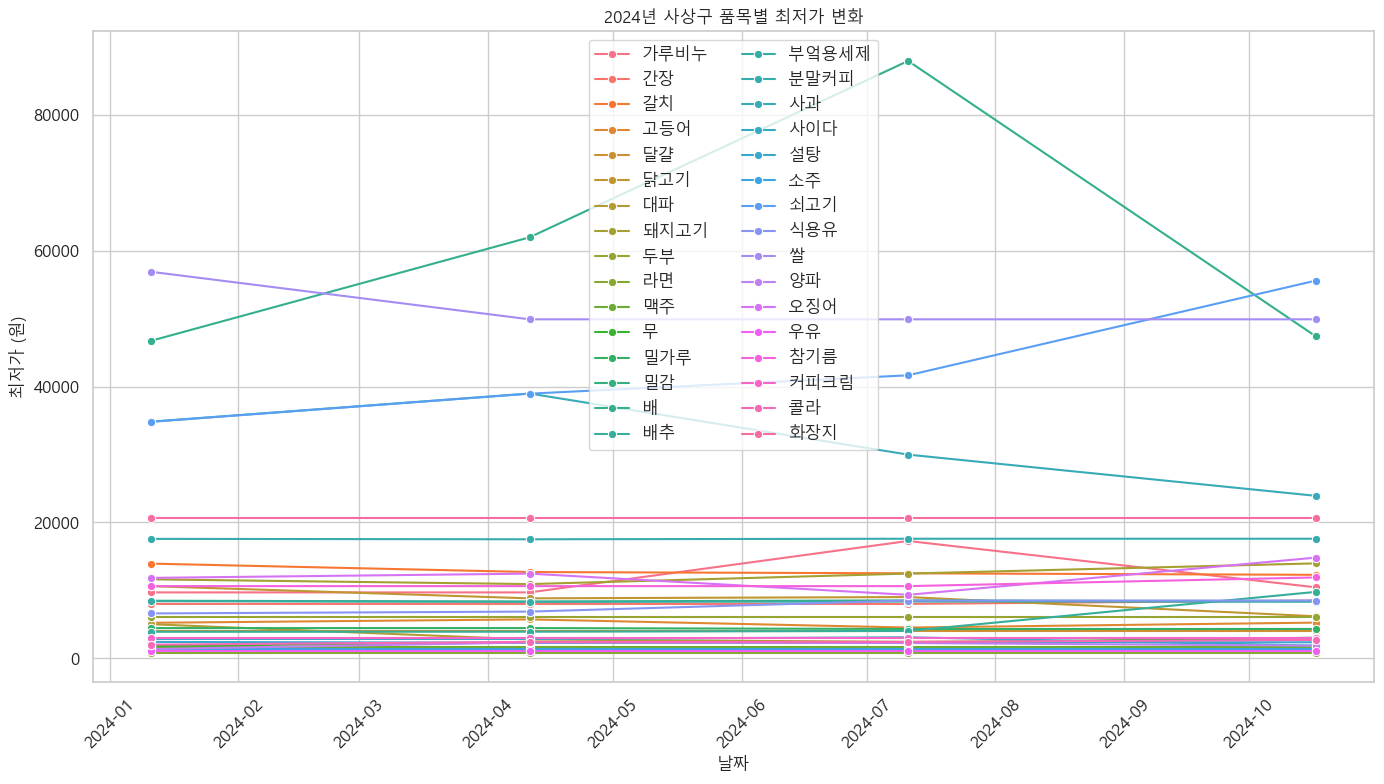

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2024_1q.csv")
q2 = pd.read_csv("사상구2024_2q.csv")
q3 = pd.read_csv("사상구2024_3q.csv")
q4 = pd.read_csv("사상구2024_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2024년 사상구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사상구2024_min.csv", index=False, encoding="utf-8-sig")

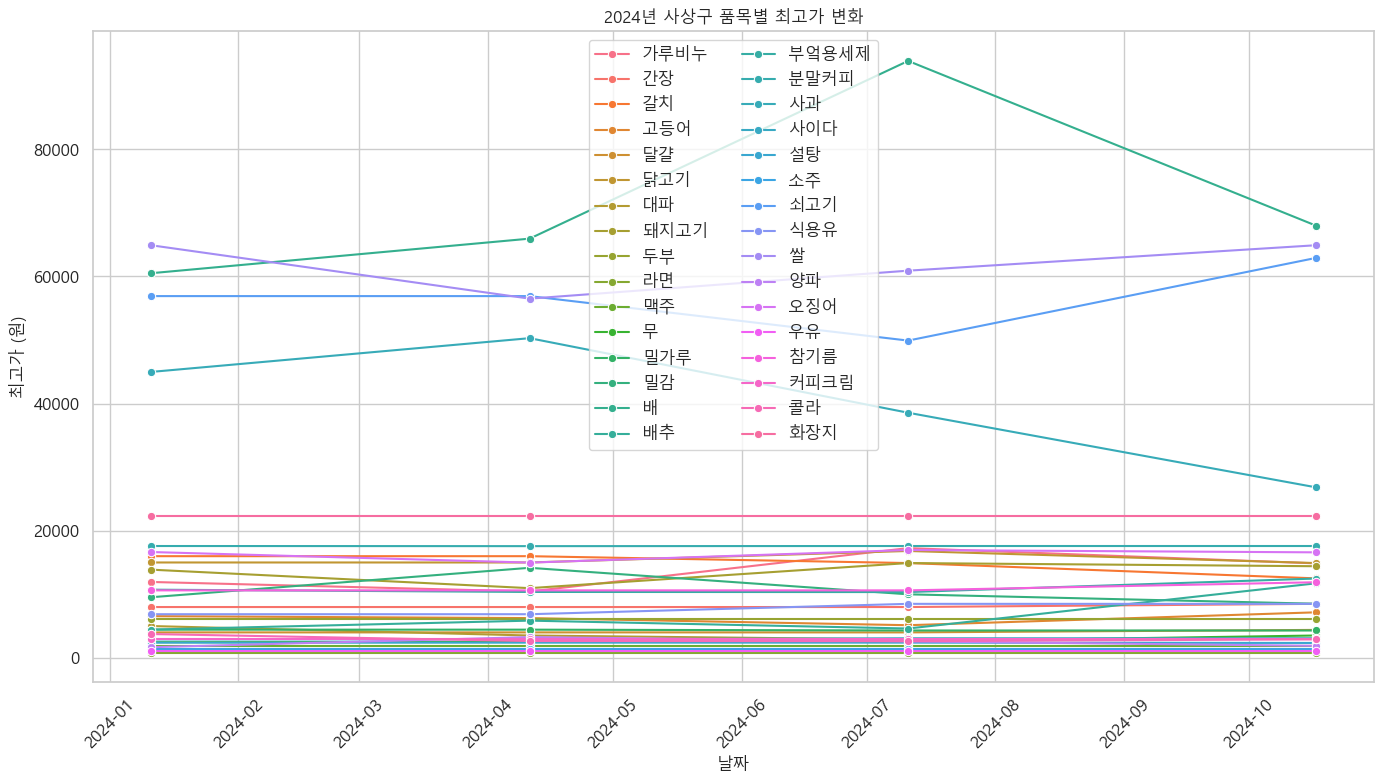

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2024_1q.csv")
q2 = pd.read_csv("사상구2024_2q.csv")
q3 = pd.read_csv("사상구2024_3q.csv")
q4 = pd.read_csv("사상구2024_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2024년 사상구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사상구2024_max.csv", index=False, encoding="utf-8-sig")